In [102]:
#bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#carregar arquivos do dataset
caminho = 'C:/Users/johnn/Documents/workspace/Projetos/medcamp_hackaton/data/'

first_health_camp = pd.read_csv(caminho + 'First_Health_Camp_Attended.csv')
health_camp_detail = pd.read_csv(caminho + 'Health_Camp_Detail.csv')
patient_profile = pd.read_csv(caminho + 'Patient_Profile.csv')
second_health_camp = pd.read_csv(caminho + 'Second_Health_Camp_Attended.csv')
third_health_camp = pd.read_csv(caminho + 'Third_Health_Camp_Attended.csv')
train = pd.read_csv(caminho + 'Train.csv')
test = pd.read_csv(caminho + 'test.csv')


In [6]:
first_health_camp.head(1)

,Patient_ID,Health_Camp_ID,Donation,Health_Score,Unnamed: 4
0,506181,6560,40,0.439024,NaN


In [7]:
health_camp_detail.head(1)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2


In [8]:
patient_profile.head(1)

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry


In [9]:
second_health_camp.head(1)

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136


In [42]:
third_health_camp.head(1)

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1


In [10]:
train.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2


In [11]:
test.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2


In [12]:
print("First Health Camp Info:")
print(first_health_camp.info())

print("\nHealth Camp Detail Info:")
print(health_camp_detail.info())

print("\nPatient Profile Info:")
print(patient_profile.info())

print("\nSecond Health Camp Info:")
print(second_health_camp.info())

print("\nThird Health Camp Info:")
print(third_health_camp.info())

print("\nTrain Data Info:")
print(train.info())

print("\nTest Data Info:")
print(test.info())


First Health Camp Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      6218 non-null   int64  
 1   Health_Camp_ID  6218 non-null   int64  
 2   Donation        6218 non-null   int64  
 3   Health_Score    6218 non-null   float64
 4   Unnamed: 4      0 non-null      float64
dtypes: float64(2), int64(3)
memory usage: 243.0 KB
None

Health Camp Detail Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Health_Camp_ID   65 non-null     int64 
 1   Camp_Start_Date  65 non-null     object
 2   Camp_End_Date    65 non-null     object
 3   Category1        65 non-null     object
 4   Category2        65 non-null     object
 5   Category3        65 non-null     int64 
dtypes: in

In [13]:
# Função para calcular valores nulos totais e porcentagem
def valores_nulos(df):
    total_nulos = df.isnull().sum()
    porcentagem_nulos = (df.isnull().sum() / len(df)) * 100
    return pd.DataFrame({'Total nulos': total_nulos, 'Procentagem de nulos': porcentagem_nulos})

# Aplicar a função a cada dataframe
print("Valores nulos em First Health Camp:")
print(valores_nulos(first_health_camp))

print("\nValores nulos em Health Camp Detail:")
print(valores_nulos(health_camp_detail))

print("\nValores nulos em Patient Profile:")
print(valores_nulos(patient_profile))

print("\nValores nulos em Second Health Camp:")
print(valores_nulos(second_health_camp))

print("\nValores nulos em Third Health Camp:")
print(valores_nulos(third_health_camp))

print("\nValores nulos em Train Data:")
print(valores_nulos(train))

print("\nValores nulos em Test Data:")
print(valores_nulos(test))

Valores nulos em First Health Camp:
                Total nulos  Procentagem de nulos
Patient_ID                0                   0.0
Health_Camp_ID            0                   0.0
Donation                  0                   0.0
Health_Score              0                   0.0
Unnamed: 4             6218                 100.0

Valores nulos em Health Camp Detail:
                 Total nulos  Procentagem de nulos
Health_Camp_ID             0                   0.0
Camp_Start_Date            0                   0.0
Camp_End_Date              0                   0.0
Category1                  0                   0.0
Category2                  0                   0.0
Category3                  0                   0.0

Valores nulos em Patient Profile:
                   Total nulos  Procentagem de nulos
Patient_ID                   0              0.000000
Online_Follower              0              0.000000
LinkedIn_Shared              0              0.000000
Twitter_Shared        

In [14]:
#removendo a coluna Unnamed: 4 pois só tem valores nulos
first_health_camp = first_health_camp.drop(columns=['Unnamed: 4'])

In [15]:

print(patient_profile.columns)

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')


In [24]:

print(first_health_camp.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score'], dtype='object')


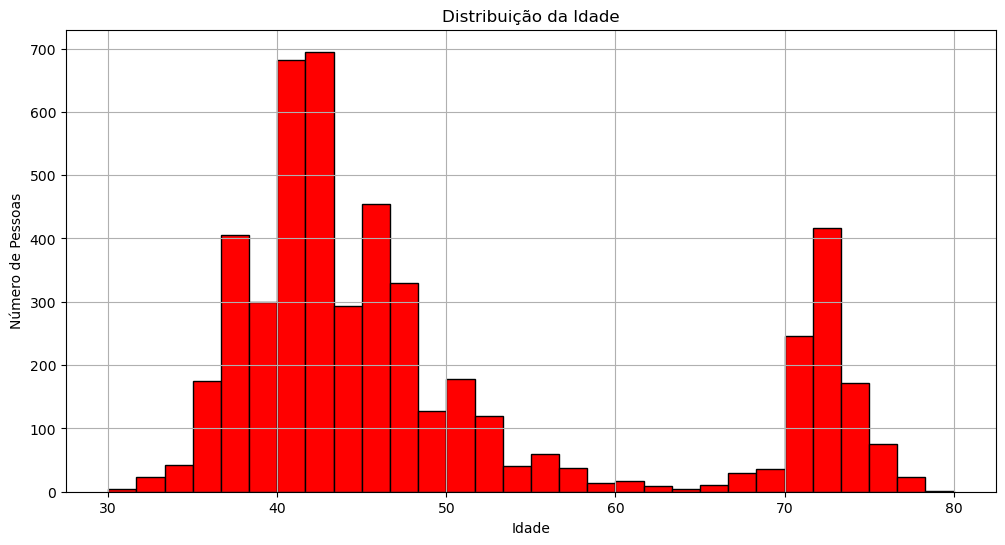

In [16]:

# visualizar a distribuição da idade
plt.figure(figsize=(12, 6))
plt.hist(patient_profile['Age'].dropna(), bins=30, color='red', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.grid(True)
plt.show()

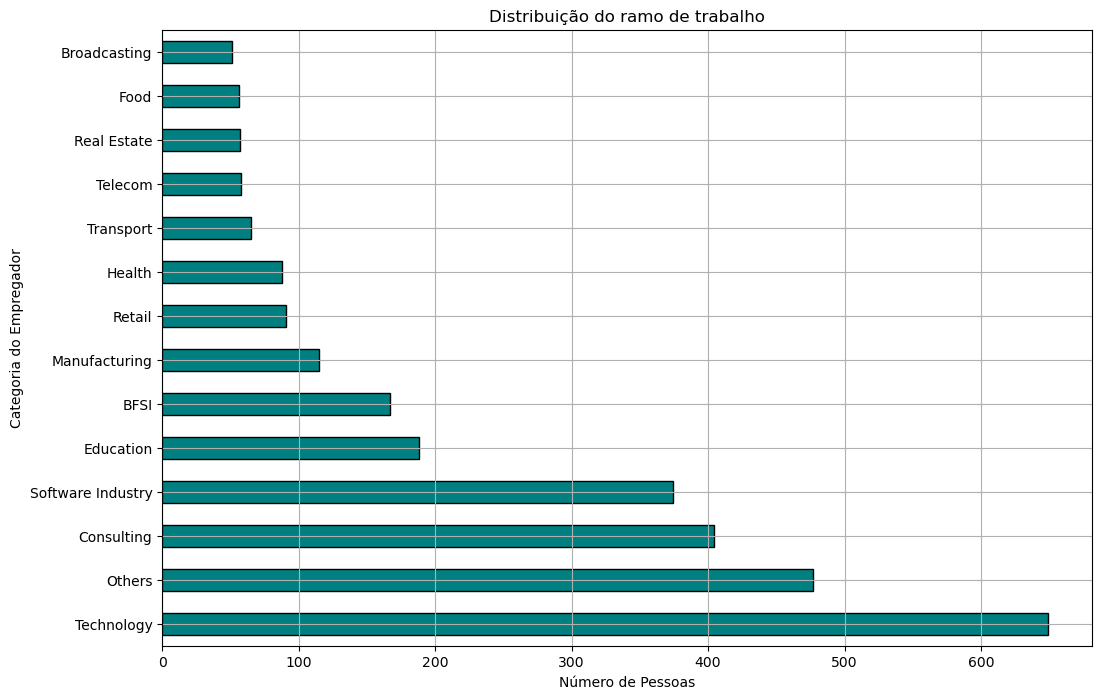

In [17]:
# distribuição da categoria do ramo de trabalho
plt.figure(figsize=(12, 8))
employer_counts = patient_profile['Employer_Category'].dropna().value_counts()
employer_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Distribuição do ramo de trabalho')
plt.xlabel('Número de Pessoas')
plt.ylabel('Categoria do Empregador')
plt.grid(True)
plt.show()


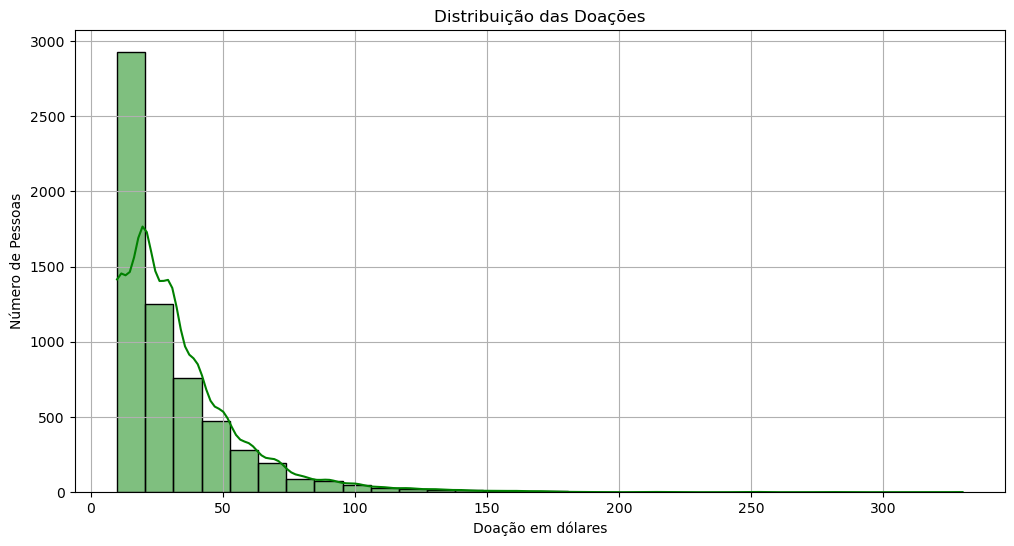

In [20]:
# Verificar visualização simples
plt.figure(figsize=(12, 6))
sns.histplot(first_health_camp['Donation'], bins=30, kde=True, color='green')
plt.title('Distribuição das Doações')
plt.xlabel('Doação em dólares')
plt.ylabel('Número de Pessoas')
plt.grid(True)
plt.show()

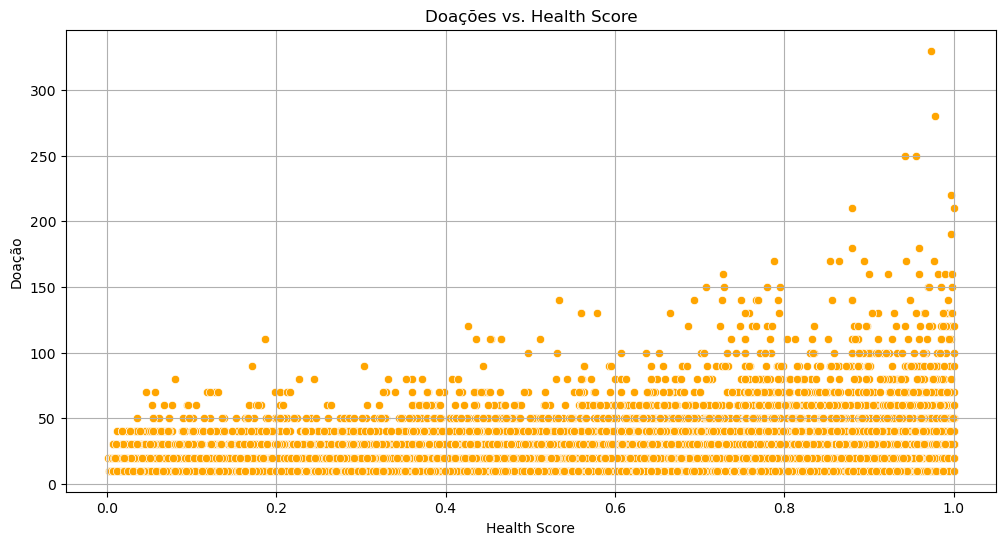

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Health_Score', y='Donation', data=first_health_camp, color='orange')
plt.title('Doações vs. Health Score')
plt.xlabel('Health Score')
plt.ylabel('Doação')
plt.grid(True)
plt.show()

In [35]:
# Unir as tabelas com base no Patient_ID
tabela_mesclada_profile_first = pd.merge(first_health_camp, patient_profile, on='Patient_ID', how='inner')

# Verificar os dados resultantes
print(tabela_mesclada_profile_first[['Age', 'Donation']].head())

    Age  Donation
0  39.0        40
1  50.0        20
2  48.0        10
3  42.0        30
4   NaN        20


In [36]:
tabela_mesclada_profile_first_filtrada = tabela_mesclada_profile_first.dropna(subset=['Age', 'Donation'])

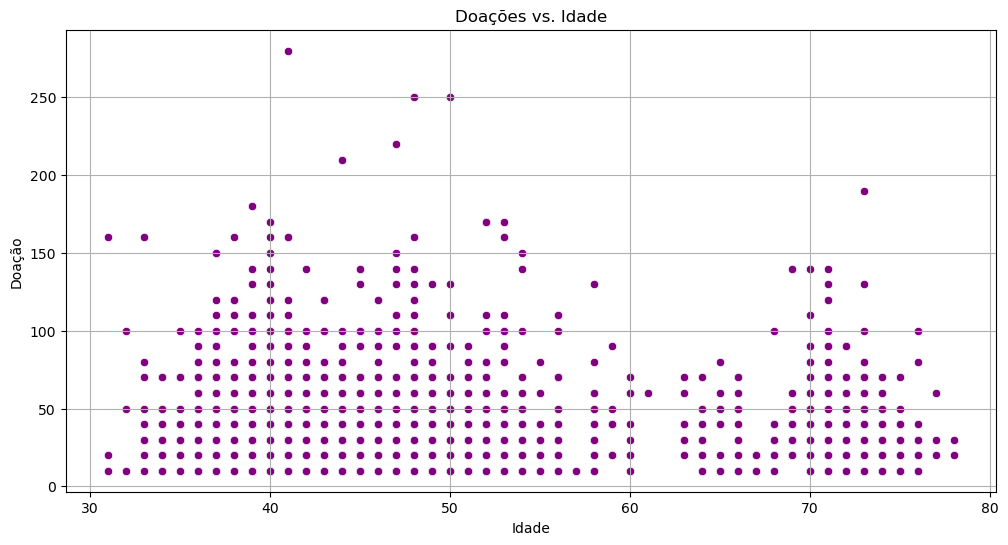

In [37]:
# Gráfico de Dispersão das Doações vs. Idade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Donation', data=tabela_mesclada_profile_first_filtrada , color='purple')
plt.title('Doações vs. Idade')
plt.xlabel('Idade')
plt.ylabel('Doação')
plt.grid(True)
plt.show()


In [38]:
# Unir as tabelas com base no Patient_ID
tabela_mesclada_profile_first_score = pd.merge(first_health_camp, patient_profile, on='Patient_ID', how='inner')

# Verificar os dados resultantes
print(tabela_mesclada_profile_first_score[['Age', 'Health_Score']].head())

    Age  Health_Score
0  39.0      0.439024
1  50.0      0.097561
2  48.0      0.048780
3  42.0      0.634146
4   NaN      0.024390


In [39]:
tabela_mesclada_profile_first_score_filtrada = tabela_mesclada_profile_first_score.dropna(subset=['Age', 'Health_Score'])

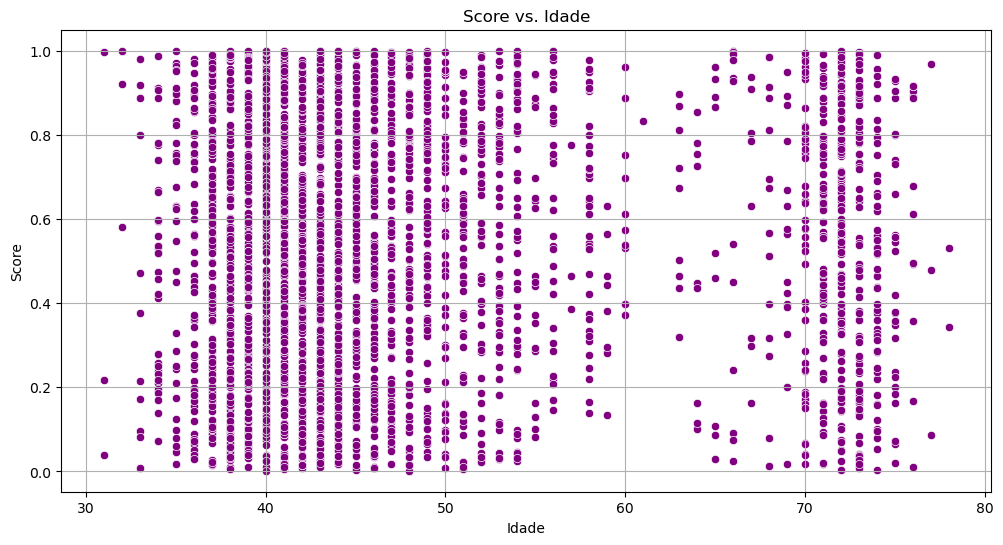

In [41]:
# Gráfico de Dispersão das Doações vs. Idade
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Health_Score', data=tabela_mesclada_profile_first_score_filtrada , color='purple')
plt.title('Score vs. Idade')
plt.xlabel('Idade')
plt.ylabel('Score')
plt.grid(True)
plt.show()


In [53]:
first_health_camp.rename(columns={'Health_Score': 'primeiro_health_score'}, inplace=True)
second_health_camp.rename(columns={'Health Score': 'segundo_health_score'}, inplace=True)
second_health_camp.head(1)


,Patient_ID,Health_Camp_ID,segundo_health_score
0,526631,6536,0.875136


In [54]:
tabela_mesclada_first_second = pd.merge(first_health_camp, second_health_camp, on='Patient_ID')
tabela_mesclada_first_second.head(1)

,Patient_ID,Health_Camp_ID_x,Donation,primeiro_health_score,Health_Camp_ID_y,segundo_health_score
0,506181,6560,40,0.439024,6529,0.691194


In [55]:
tabela_mesclada_first_second['Diferença_Health_Score'] = tabela_mesclada_first_second['segundo_health_score'] - tabela_mesclada_first_second['primeiro_health_score']
print(tabela_mesclada_first_second[['Patient_ID', 'primeiro_health_score', 'segundo_health_score', 'Diferença_Health_Score']].head())

   Patient_ID  primeiro_health_score  segundo_health_score  \
0      506181               0.439024              0.691194   
1      494977               0.097561              0.673181   
2      494977               0.097561              0.615827   
3      492080               0.658537              0.983595   
4      521555               0.536585              0.423103   

   Diferença_Health_Score  
0                0.252170  
1                0.575620  
2                0.518266  
3                0.325059  
4               -0.113482  


In [57]:
# Estatísticas descritivas
print(tabela_mesclada_first_second['Diferença_Health_Score'].describe())

# Verificando a quantidade de mudanças positivas, negativas e sem mudança
print((tabela_mesclada_first_second['Diferença_Health_Score'] > 0).sum(), "pacientes melhoraram")
print((tabela_mesclada_first_second['Diferença_Health_Score'] < 0).sum(), "pacientes pioraram")
print((tabela_mesclada_first_second['Diferença_Health_Score'] == 0).sum(), "pacientes permaneceram iguais")


count    5212.000000
mean        0.069041
std         0.377778
min        -0.921600
25%        -0.190419
50%         0.058752
75%         0.336979
max         0.979100
Name: Diferença_Health_Score, dtype: float64
2946 pacientes melhoraram
2266 pacientes pioraram
0 pacientes permaneceram iguais


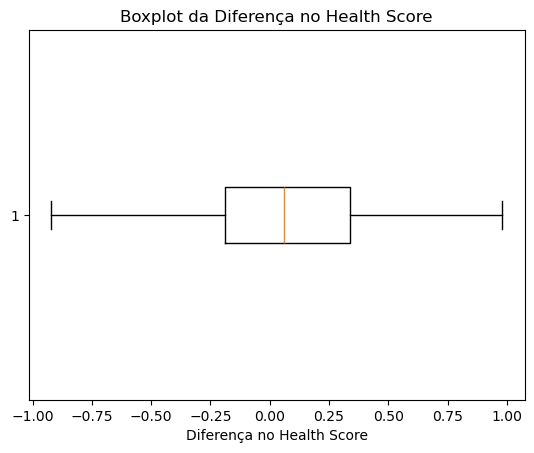

In [58]:
plt.boxplot(tabela_mesclada_first_second['Diferença_Health_Score'], vert=False)
plt.title('Boxplot da Diferença no Health Score')
plt.xlabel('Diferença no Health Score')
plt.show()

In [60]:
t_statistic, p_value = stats.ttest_rel(tabela_mesclada_first_second['primeiro_health_score'], tabela_mesclada_first_second['segundo_health_score'])
print(f"Teste t de student: {t_statistic}, P-valor: {p_value}")

Teste t de student: -13.193883657541571, P-valor: 4.010595835232674e-39


**Resumo Estatístico**

Média (mean): A média da diferença no Health_Score é aproximadamente 0.069(6%), indicando que, em média, houve uma pequena melhora nos scores dos pacientes.
Desvio Padrão (std): O desvio padrão é 0.377, mostrando uma variabilidade considerável nas mudanças.
Mínimo (min): A maior queda no score foi de -0.9216.
Máximo (max): A maior melhora no score foi de 0.9791.
Quartis (25%, 50%, 75%): Mostram a distribuição das mudanças, com a mediana (50%) em torno de 0.0587.


Contagem de Pacientes
Melhoraram: 2946 pacientes tiveram uma melhora no Health_Score.
Pioraram: 2266 pacientes tiveram uma piora no Health_Score.
Permaneceram Iguais: Nenhum paciente teve um score exatamente igual nos dois camps, o que sugere que houve mudanças em todos os casos.


**Análise e Considerações**
Variabilidade das Mudanças: Com um desvio padrão de 0.377, há uma dispersão considerável nas mudanças dos scores, o que pode indicar diferentes respostas aos camps de saúde.

Distribuição das Mudanças: O fato de mais pacientes terem melhorado do que piorado sugere que os camps podem estar contribuindo positivamente para a saúde dos participantes. No entanto, há um número significativo de pacientes que pioraram, o que merece investigação adicional.

Testes Estatísticos: Para confirmar se a mudança média de 0.069 é estatisticamente significativa, é útil realizar um teste t pareado ou outro teste estatístico apropriado. O valor p deste teste ajudará a determinar se a mudança observada é devida ao acaso ou se é significativa.

In [63]:
print(third_health_camp.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')


In [68]:
# Mesclar com a tabela de saúde do primeiro e segundo camp
tabela_mesclada_first_second_third = pd.merge(third_health_camp, tabela_mesclada_first_second, on='Patient_ID')

# Calcular a média do Health_Score dos primeiros e segundos camps
tabela_mesclada_first_second_third['Average_Health_Score'] = (tabela_mesclada_first_second_third['primeiro_health_score'] + tabela_mesclada_first_second_third['segundo_health_score']) / 2

# Visualizar a tabela resultante
tabela_mesclada_first_second_third.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number,Health_Camp_ID_x,Donation,primeiro_health_score,Health_Camp_ID_y,segundo_health_score,Diferença_Health_Score,Average_Health_Score
0,504692,6578,1,1,6538,30,0.087859,6523,0.373206,0.285346,0.230533
1,504692,6578,1,1,6538,30,0.087859,6549,0.113106,0.025246,0.100483
2,504692,6578,1,1,6565,20,0.439024,6523,0.373206,-0.065819,0.406115
3,504692,6578,1,1,6565,20,0.439024,6549,0.113106,-0.325918,0.276065
4,504692,6578,1,1,6526,10,0.378571,6523,0.373206,-0.005366,0.375889


In [70]:
# Verificar a correlação entre Number_of_Stall_Visited e Average_Health_Score
correlation = tabela_mesclada_first_second_third[['Number_of_stall_visited', 'Average_Health_Score']].corr().iloc[0, 1]
print(f"Correlação entre Number_of_Stall_Visited e Average_Health_Score: {correlation}")


Correlação entre Number_of_Stall_Visited e Average_Health_Score: 0.07981525016543954


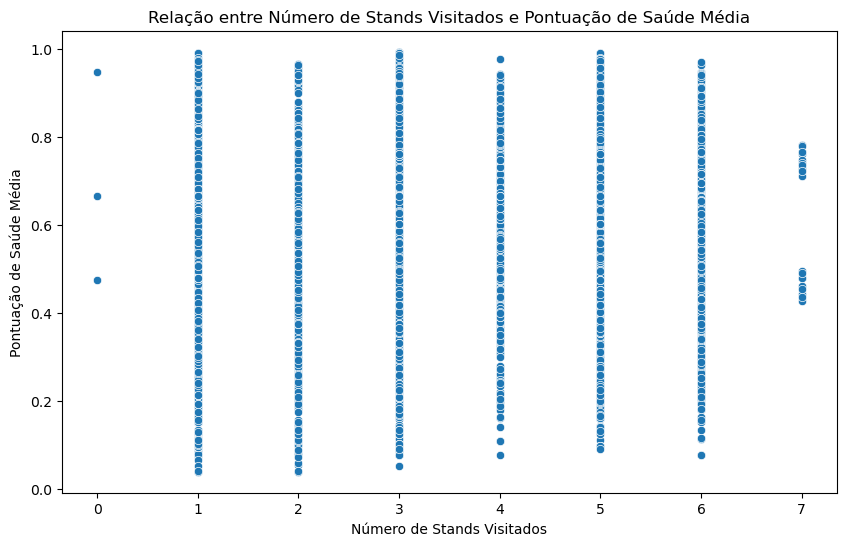

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_stall_visited', y='Average_Health_Score', data=tabela_mesclada_first_second_third)
plt.title('Relação entre Número de Stands Visitados e Pontuação de Saúde Média')
plt.xlabel('Número de Stands Visitados')
plt.ylabel('Pontuação de Saúde Média')
plt.show()

In [76]:
import statsmodels.api as sm

# Preparar os dados para regressão
X = tabela_mesclada_first_second_third[['Number_of_stall_visited']]
y = tabela_mesclada_first_second_third['Average_Health_Score']
X = sm.add_constant(X)  # Adiciona o intercepto

# Ajustar o modelo de regressão
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Average_Health_Score   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.006
Method:                   Least Squares   F-statistic:                     34.75
Date:                  Mon, 29 Jul 2024   Prob (F-statistic):           3.98e-09
Time:                          19:54:39   Log-Likelihood:                 948.42
No. Observations:                  5422   AIC:                            -1893.
Df Residuals:                      5420   BIC:                            -1880.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

In [78]:
print(train.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')


In [79]:
print(test.columns)

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')
